In [15]:
""" import the frequently used modules """
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from pandas import DataFrame as DF, Series as SR, read_csv as CSV, read_excel as EX
from datetime import datetime, timedelta
import sys, os, importlib, math, sympy, scipy
%matplotlib inline

from logging import getLogger, DEBUG, INFO, FileHandler, StreamHandler, Formatter
formatter = Formatter('%(asctime)s - %(levelname)s - %(message)s')
sh = StreamHandler()
sh.setLevel(DEBUG)
fh = FileHandler(datetime.now().strftime('/tmp/%Y%m%d.log'))
fh.setFormatter(formatter)
fh.setLevel(INFO)
l = getLogger(__name__)
l.handlers = []
l.setLevel(DEBUG)
l.addHandler(sh)
l.addHandler(fh)

In [16]:
def calc_poisson_distribution(Ys, poisson_mean):
    """ Return the probabilities to be the each value of y (array) given the poisson_mean (lambda)
    using the poisson distribution probability model
    """
    numerator = np.power(poisson_mean, Ys) * np.exp(-poisson_mean)
    denominator = scipy.misc.factorial(Ys)
    return numerator / denominator

In [17]:
def generate_samples(accumulated_probabilities, sample_size):
    """ Return the digitized result of the samples
    """
    samples = np.random.rand(sample_size)
    digitized_samples = np.digitize(samples, accumulated_probabilities)
    return digitized_samples

In [158]:
def calc_llv_of_poission_distribution(Ys, poisson_mean):
    """ Return the log likelihood value of the poisson distribution
    """
#     return np.log(np.prod(calc_poisson_distribution(Ys, poission_mean))) """ cannot take care if the number of Y becomes large """
    return sum(Ys * np.log(poisson_mean) - poisson_mean - np.log(scipy.misc.factorial(Ys)))

# calculate probabilities & test with sample data

# sum of probabilities (%): 99.7
# accumulated probabilities (%): {0: 3, 1: 13, 2: 32, 3: 53, 4: 72, 5: 85, 6: 93, 7: 97, 8: 99, 9: 100}
# variance of digitized_samples: 3.426


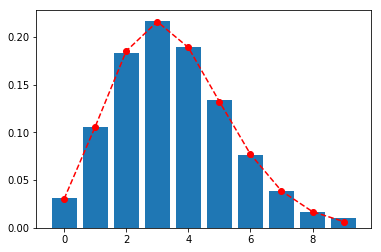

In [161]:
Y_count = 10
poisson_mean = 3.5
sample_size = 100000
Ys = np.arange(Y_count)

probabilities = calc_poisson_distribution(Ys, poisson_mean)
l.debug("# sum of probabilities (%): {}".format(probabilities.sum().round(3) * 100))

accumulated_probabilities = np.add.accumulate(probabilities)
accumulated_probabilities[-1] = 1
l.info("# accumulated probabilities (%): {}".format(dict(zip(Ys, (accumulated_probabilities * 100).astype(int)))))
    
digitized_samples = generate_samples(accumulated_probabilities, sample_size=sample_size)
l.info(f"# variance of digitized_samples: {digitized_samples.var().round(3)}")

""" Series (key: Y, value: number of Y) """
number_of_Y = pd.Series(digitized_samples).value_counts().sort_index() / len(digitized_samples)

plt.bar(number_of_Y.index, number_of_Y.values)
plt.plot(Ys, probabilities, linestyle='--', marker='o', c='red')
plt.show()

# calculate the best fit point of the digitized sample data

best_fit: mean=3.490000000000002, log_likelihood_value=-200907.189733068


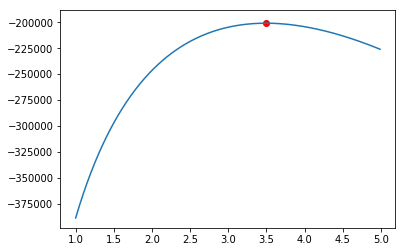

In [162]:
testing_means = np.arange(1, 5, 0.01)
mean_llv = [(mean, calc_llv_of_poission_distribution(digitized_samples, mean)) for mean in testing_means]
mean_llv_df = DF(mean_llv, columns=['mean', 'llv'])
best_fit = mean_llv_df[mean_llv_df.llv == mean_llv_df.llv.max()].to_dict('record')[0]
l.info(f"best_fit: mean={best_fit['mean']}, log_likelihood_value={best_fit['llv']}")

plt.plot(mean_llv_df['mean'], mean_llv_df['llv'])
plt.scatter(best_fit['mean'], best_fit['llv'], color='red')